In [12]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '_')))

In [8]:
import pandas as pd 
data = pd.read_csv(r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\raw_analyst_ratings.csv")
data

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


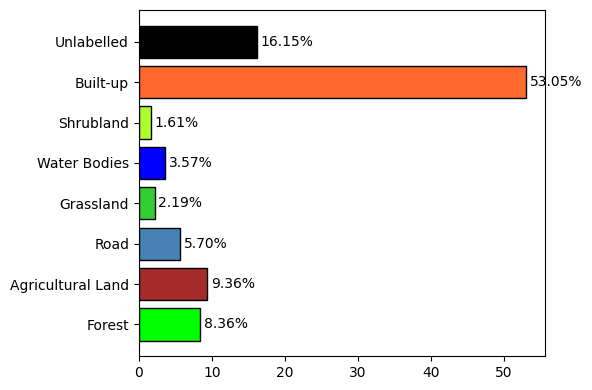

In [18]:
import os
import cv2
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Define the class color map
class_color_map = {
      'Forest': [0, 255, 0],
    'Agricultural Land': [165, 42, 42],
    'Road': [70, 130, 180],
    'Grassland': [50, 205, 50],
    'Water Bodies': [0, 0, 255],
    'Shrubland': [173, 255, 47],
    'Built-up': [255, 105, 45],
    'Unlabelled': [0, 0, 0],
}

# Initialize a dictionary to store pixel counts for each class
class_pixel_counts = defaultdict(int)

# Folder containing the mask images
mask_folder = r'C:\Users\fikad\Desktop\FINAL\MASK'  # Replace with your mask folder path

# Process each mask in the folder
for mask_file in os.listdir(mask_folder):
    mask_path = os.path.join(mask_folder, mask_file)
    
    # Read the mask image
    mask = cv2.imread(mask_path)
    if mask is None:
        print(f"Warning: Unable to read {mask_path}")
        continue

    # Convert the image from BGR to RGB
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    
    # Count pixels for each class
    for class_name, color in class_color_map.items():
        # Create a mask for pixels matching the class color
        class_mask = np.all(mask_rgb == color, axis=-1)
        class_pixel_counts[class_name] += np.sum(class_mask)

# Calculate total pixels across all classes
total_pixels = sum(class_pixel_counts.values())

# Prepare data for the bar chart
class_names = []
class_counts = []
for class_name, count in class_pixel_counts.items():
    percentage = (count / total_pixels) * 100 if total_pixels > 0 else 0
    class_names.append(class_name)
    class_counts.append(percentage)

# Plot the class distribution as a bar chart
plt.figure(figsize=(6, 4))
bars = plt.barh(
    class_names,
    class_counts,
    color=[np.array(color) / 255.0 for color in class_color_map.values()],
    edgecolor='black'
)

# Add percentage text next to the bars
for bar, percentage in zip(bars, class_counts):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{percentage:.2f}%",
        va='center',
        fontsize=10
    )

# Customize the plot
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.tight_layout()
plt.show()